<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW2_Problem2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from IPython.display import display
display(housing)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Separate features and labels

#area, bedrooms, bathrooms, stories, parking

X1 = housing.values[:,1]  # get AREA input values from the second column
X2 = housing.values[:,2]  # get BEDROOM input values from the third column
X3 = housing.values[:,3]  # get BATHROOM input values from the fourth column
X4 = housing.values[:,4]  # get STORIES input values from the fith column
X5 = housing.values[:,10]  # get PARKING input values from the eleventh column
y = housing.values[:,0]  # get output values from fourth column -- Y is the list here
m = len(y)  # Number of training examples

# Display first 5 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])
print('y = ', y[: 5])
print('m = ', m)

X1 =  [7420 8960 9960 7500 7420]
X2 =  [4 4 3 4 4]
X3 =  [2 4 2 2 1]
X4 =  [3 4 2 2 2]
X5 =  [2 3 2 3 2]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545


In [ ]:
print('X1 = ', X1[: 100])
print('X2 = ', X2[: 100])
print('X3 = ', X3[: 100])
print('X4 = ', X4[: 100])
print('X5 = ', X5[: 100])
print('y = ', y[: 100])

X1 =  [7420 8960 9960 7500 7420 7500 8580 16200 8100 5750 13200 6000 6550 3500
 7800 6000 6600 8500 4600 6420 4320 7155 8050 4560 8800 6540 6000 8875
 7950 5500 7475 7000 4880 5960 6840 7000 7482 9000 6000 6000 6550 6360
 6480 6000 6000 6000 6000 6600 4300 7440 7440 6325 6000 5150 6000 6000
 11440 9000 7680 6000 6000 8880 6240 6360 11175 8880 13200 7700 6000 12090
 4000 6000 5020 6600 4040 4260 6420 6500 5700 6000 6000 4000 10500 6000
 3760 8250 6670 3960 7410 8580 5000 6750 4800 7200 6000 4100 9000 6400
 6600 6000]
X2 =  [4 4 3 4 4 3 4 5 4 3 3 4 4 4 3 4 4 3 3 3 3 3 3 3 3 4 3 3 5 4 3 3 4 3 5 3 3
 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 4 3 3 3 4 4 4 3 3 2 4 4 3 3 2 3 3 4 3 4 3 2
 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 2 3 3 4 3 3 3 3 4]
X3 =  [2 4 2 2 1 3 3 3 1 2 1 3 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 3 1 2 2
 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 1 2
 1 2 2 2 1 2 1 2 2 2 1 2 1 1 1 3 1 1 2 2 2 2 1 1 2 1]
X4 =  [3 4 2 2 2 1 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 1 1 2 2 2

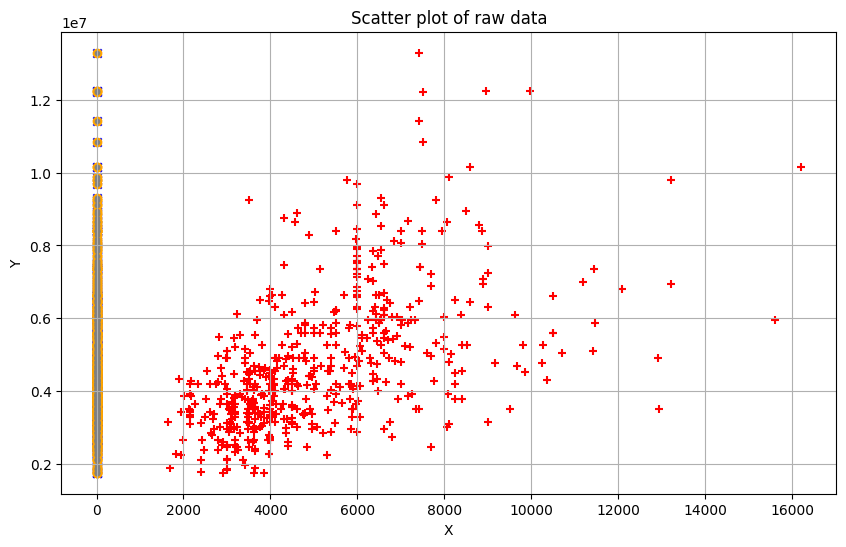

In [ ]:
# Scatter plot
plt.scatter(X1, y, color='red', marker='+')
plt.scatter(X2, y, color='blue', marker='x')
plt.scatter(X3, y, color='purple', marker='*')
plt.scatter(X4, y, color='orange', marker='o')
plt.scatter(X5, y, color='gray', marker='.')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Scatter plot of raw data')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_newTrain=df_train[num_vars]
df_newTrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,0.432609,0.4,0.000000,0.000000,0.333333,0.596970
41,0.314954,0.4,0.333333,1.000000,0.000000,0.527273
91,0.342105,0.2,0.000000,0.000000,0.666667,0.404242
118,0.319131,0.4,0.000000,0.000000,0.000000,0.363636
472,0.124896,0.6,0.000000,0.333333,1.000000,0.109091


In [ ]:
df_newTrain.shape

(436, 6)

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_newTest=df_test[num_vars]
df_newTest.head()

,area,bedrooms,bathrooms,stories,parking,price
265,0.088172,0.333333,0.0,0.333333,0.000000,0.248485
54,0.311828,0.333333,0.5,0.333333,0.333333,0.531987
171,0.617849,0.333333,0.0,0.000000,0.333333,0.329966
244,0.263082,0.333333,0.0,0.333333,0.000000,0.262626
268,0.236559,0.666667,0.0,0.333333,0.000000,0.246465


In [ ]:
df_newTest.shape

(109, 6)

In [ ]:
y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

In [ ]:
y_newTrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [ ]:
y_newTest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [ ]:
X_newTrain = df_newTrain
X_newTest = df_newTest

In [ ]:
X_newTrain.head()

,area,bedrooms,bathrooms,stories,parking
22,0.432609,0.4,0.000000,0.000000,0.333333
41,0.314954,0.4,0.333333,1.000000,0.000000
91,0.342105,0.2,0.000000,0.000000,0.666667
118,0.319131,0.4,0.000000,0.000000,0.000000
472,0.124896,0.6,0.000000,0.333333,1.000000


In [ ]:
X_newTest.head()

,area,bedrooms,bathrooms,stories,parking
265,0.088172,0.333333,0.0,0.333333,0.000000
54,0.311828,0.333333,0.5,0.333333,0.333333
171,0.617849,0.333333,0.0,0.000000,0.333333
244,0.263082,0.333333,0.0,0.333333,0.000000
268,0.236559,0.666667,0.0,0.333333,0.000000


In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
"""
X_newTrain = X_newTrain.reshape(len(X_newTrain), 1)
X_newTrain[:10]
"""

'\nX_newTrain = X_newTrain.reshape(len(X_newTrain), 1)\nX_newTrain[:10]\n'

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        ]])

In [ ]:
X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        0.33333333],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        0.33333333],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        0.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        0.        ]])

In [ ]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.03824530285048989


In [ ]:
def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.010681967587197253


In [ ]:
def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history, test_cost_history= gradient_descent(xTrain, y_newTrain, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.11713158 0.15137085 0.09042785 0.13979249 0.13736298 0.11748461]
cost_history = [0.03742194 0.03662086 0.03584145 ... 0.00566797 0.00566731 0.00566665]


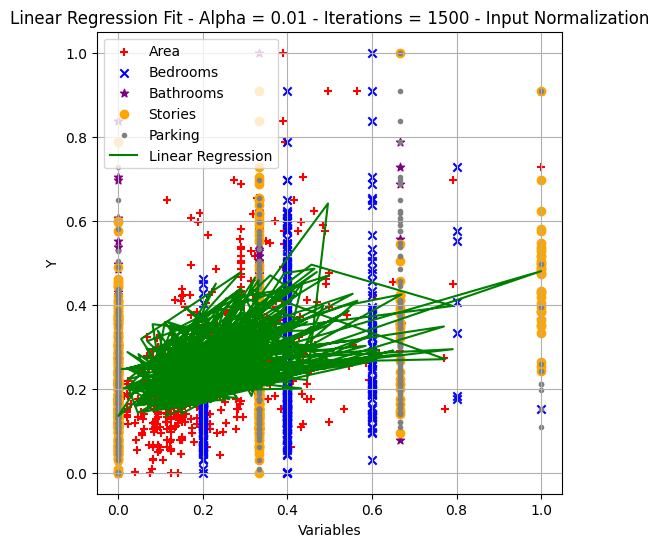

In [ ]:
# Scatter plot
#area, bedrooms, bathrooms, stories, parking
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Parking')

# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.01 - Iterations = 1500 - Input Normalization')
plt.legend()

# Show the plot
plt.show()

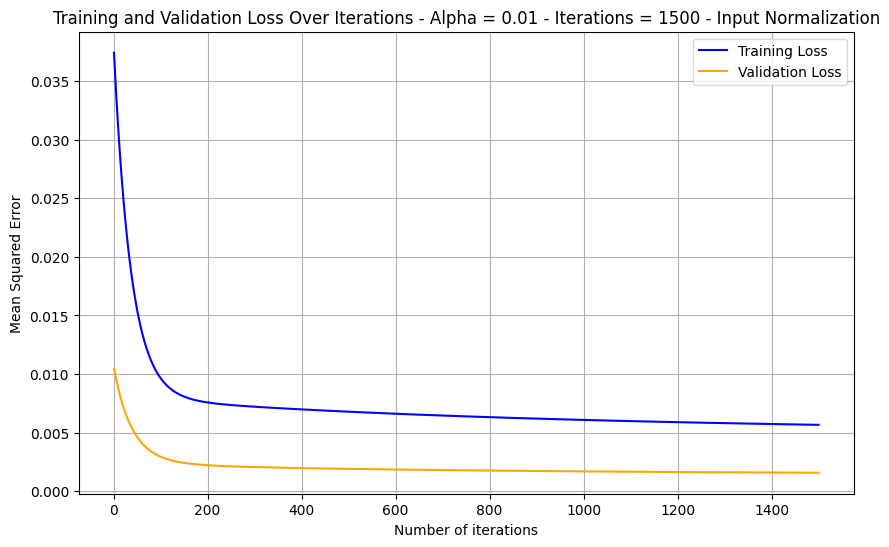

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.01 - Iterations = 1500 - Input Normalization')

# Show the plot
plt.show()

In [ ]:
#RUNNING AGAIN WITH Standard Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_newTrain=df_train[num_vars]
df_newTrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,1.351873,0.078679,-0.579897,-0.929023,0.311484,2.063847
41,0.565326,0.078679,1.410929,2.474792,-0.849261,1.632233
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229,0.870342
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261,0.618880
472,-0.705249,1.450841,-0.579897,0.205582,2.632974,-0.957447


In [ ]:
df_newTrain.shape

(436, 6)

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_newTest=df_test[num_vars]
df_newTest.head()

,area,bedrooms,bathrooms,stories,parking,price
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743,-0.131863
54,0.369177,-0.072023,1.466964,0.308415,0.545545,1.436782
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545,0.318983
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743,-0.053617
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743,-0.143041


In [ ]:
df_newTest.shape

(109, 6)

In [ ]:
y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

In [ ]:
y_newTrain.head()

22     2.063847
41     1.632233
91     0.870342
118    0.618880
472   -0.957447
Name: price, dtype: float64

In [ ]:
y_newTest.head()

265   -0.131863
54     1.436782
171    0.318983
244   -0.053617
268   -0.143041
Name: price, dtype: float64

In [ ]:
X_newTrain = df_newTrain
X_newTest = df_newTest

In [ ]:
X_newTrain.head()

,area,bedrooms,bathrooms,stories,parking
22,1.351873,0.078679,-0.579897,-0.929023,0.311484
41,0.565326,0.078679,1.410929,2.474792,-0.849261
91,0.746837,-1.293483,-0.579897,-0.929023,1.472229
118,0.593251,0.078679,-0.579897,-0.929023,-0.849261
472,-0.705249,1.450841,-0.579897,0.205582,2.632974


In [ ]:
X_newTest.head()

,area,bedrooms,bathrooms,stories,parking
265,-1.020953,-0.072023,-0.531775,0.308415,-0.643743
54,0.369177,-0.072023,1.466964,0.308415,0.545545
171,2.271249,-0.072023,-0.531775,-0.936669,0.545545
244,0.066200,-0.072023,-0.531775,0.308415,-0.643743
268,-0.098656,1.236396,-0.531775,0.308415,-0.643743


In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
"""
X_newTrain = X_newTrain.reshape(len(X_newTrain), 1)
X_newTrain[:10]
"""

'\nX_newTrain = X_newTrain.reshape(len(X_newTrain), 1)\nX_newTrain[:10]\n'

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

array([[ 1.        ,  1.35187274,  0.07867901, -0.57989658, -0.92902305,
         0.31148433],
       [ 1.        ,  0.56532627,  0.07867901,  1.41092949,  2.4747925 ,
        -0.8492607 ],
       [ 1.        ,  0.746837  , -1.29348292, -0.57989658, -0.92902305,
         1.47222936],
       [ 1.        ,  0.593251  ,  0.07867901, -0.57989658, -0.92902305,
        -0.8492607 ],
       [ 1.        , -0.7052488 ,  1.45084094, -0.57989658,  0.20558213,
         2.6329744 ]])

In [ ]:
X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

array([[ 1.        , -1.02095327, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        ,  0.3691766 , -0.07202305,  1.46696416,  0.30841537,
         0.54554473],
       [ 1.        ,  2.27124853, -0.07202305, -0.53177451, -0.93666891,
         0.54554473],
       [ 1.        ,  0.06619958, -0.07202305, -0.53177451,  0.30841537,
        -0.64374278],
       [ 1.        , -0.09865556,  1.23639571, -0.53177451,  0.30841537,
        -0.64374278]])

In [ ]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.4


In [ ]:
def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 0.09999999999999999


In [ ]:
def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0]
iterations = 1500
alpha = 0.01

In [ ]:
theta, cost_history, test_cost_history= gradient_descent(xTrain, y_newTrain, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [1.73846666e-16 3.91363403e-01 4.25653367e-02 3.43814033e-01
 2.48684180e-01 1.54055165e-01]
cost_history = [0.39223213 0.38474511 0.37752857 ... 0.1750219  0.1750219  0.1750219 ]


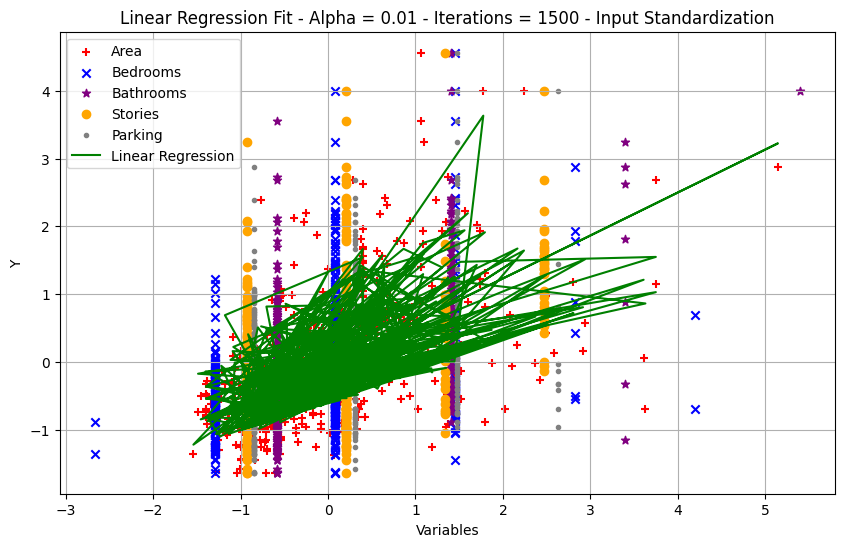

In [ ]:
# Scatter plot
#area, bedrooms, bathrooms, stories, parking
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Parking')

# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.01 - Iterations = 1500 - Input Standardization')
plt.legend()

# Show the plot
plt.show()

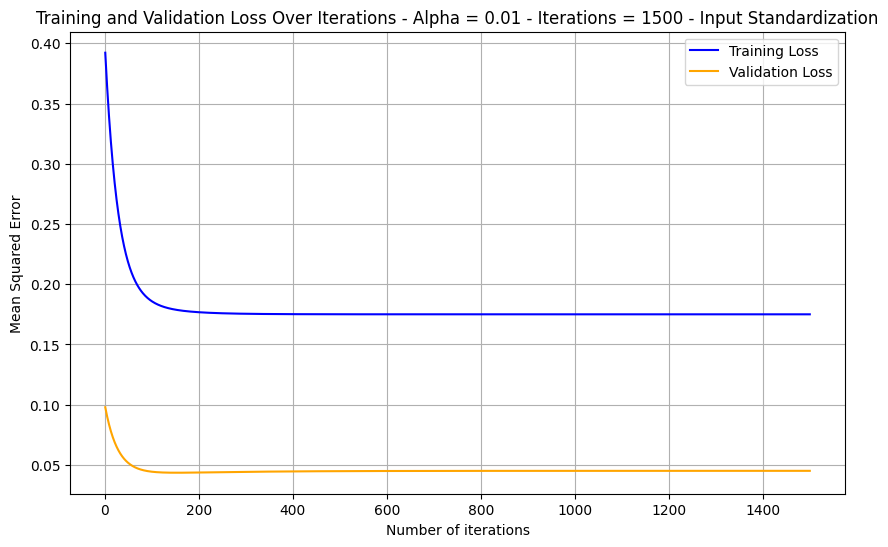

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.01 - Iterations = 1500 - Input Standardization')

# Show the plot
plt.show()